In [26]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sys
assert 'zipfile' in sys.modules
import math
import seaborn as sns
import matplotlib.pyplot as plt

# import the widgets module

import scipy.stats as ss
from collections import Counter
import warnings
from sklearn.preprocessing import OneHotEncoder

# Authenticate and create the PyDrive client.

# MODEL PROTOTYPE V.1:


## The Narrative: 
Our product is a solution to an industry-wide dilemma of how to keep data unbiased once put through a workflow. We want to ensure that the data accurately represents the population of the datafied world. Our goal is to ultimately make a tool useful to Kinesso, and in general advertisement firms and their clients, who would want their actual audience pool to be wider and more representative of the intended audience.



## The Solution: 

A common fix to unbiasing the data is to keep on introducing new clean data. However, the data inevitably is sullied. Our solution tackles bias during the early stages of workflow, specifically during audience assembly. The product will accompany the SQL like workflow of Kinesso in building their audiences for campaigns, and alarm the user when there is potential bias in their audience selection.


EXAMPLE OF WORKFLOW WITH SOME EDA: 

**disclaimer: the following scenario is a very simplified version of what actually happens in the real world** 

Our client Toyota asks us to help them run a campaign in LA. We go to our vast database and start building an audience. We start with a vast dataset of past log events with geographical information. 
 


In [27]:
df = pd.read_csv('Data/Audience_LA.csv')
df.head(10)

,Unnamed: 0,ZIP,GENDER,AGE,STATE_ABBREVIATION,DMA_NAME_ACXIOM,DEMO_HH_INCOME,ETHNICITY,HOMEOWNERSHIP_STATUS,EDUCATION
0,0,71202,M,67.0,LA,Monroe-El Dorado,"$30,000 to $49,999",African American,Homeowner,High School
1,1,70438,F,33.0,LA,New Orleans,"$100,000 to $149,999",White,Renter,College
2,2,70770,F,59.0,LA,Baton Rouge,"Less than $30,000",White,Homeowner,College
3,3,71108,F,63.0,LA,Shreveport,"$30,000 to $49,999",African American,Homeowner,College
4,4,70802,F,81.0,LA,Baton Rouge,"Less than $30,000",African American,Homeowner,not_reported
5,5,70115,M,65.0,LA,New Orleans,"$30,000 to $49,999",African American,Renter,not_reported
6,6,70118,F,59.0,LA,New Orleans,"Less than $30,000",White,Homeowner,not_reported
7,7,70117,M,19.0,LA,New Orleans,"Less than $30,000",African American,Renter,High School
8,8,70006,F,29.0,LA,New Orleans,"$30,000 to $49,999",White,Renter,not_reported
9,9,70086,F,49.0,LA,New Orleans,"$100,000 to $149,999",African American,Renter,College


In [28]:
df = df.replace('NaN',0)


Toyota asked us to find clients that would be interested in buying their Toyota Siennas! We start by looking for households that own homes, and that approximatley earn on average,[ a yearly household income of $111,500](https://motorandwheels.com/11-toyota-sienna-statistics-facts/#:~:text=Sienna%20buyers%20are%20younger%20than,yearly%20household%20income%20of%20%24111%2C500).

In [29]:
sienna= df[df['HOMEOWNERSHIP_STATUS'] == 'Homeowner']

In [30]:
len(df.index) - len(sienna.index) 

886037

<ipython-input-31-e9cb007d708e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dataframe'] = 'df'
<ipython-input-31-e9cb007d708e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['dataframe'] = 'sienna'


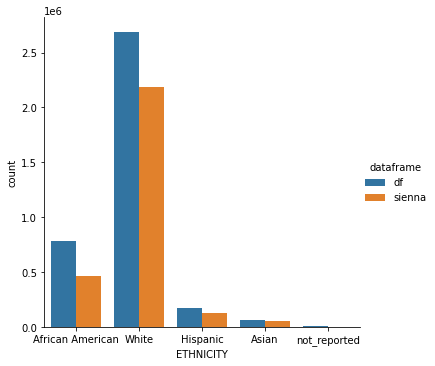

In [31]:
new_df = df[['ETHNICITY']]
new_df['dataframe'] = 'df'
new_df2 = sienna[['ETHNICITY']]
new_df2['dataframe'] = 'sienna'
combined = new_df.append(new_df2)
combined

sns.catplot(x = "ETHNICITY", kind="count", hue = 'dataframe', data=combined) 


In [32]:
df.DEMO_HH_INCOME.unique()

array(['$30,000 to $49,999', '$100,000 to $149,999', 'Less than $30,000',
       '$50,000 to $74,999', '$200,000 to $249,999', '$75,000 to $99,999',
       '$250,000 +', '$150,000 to $199,999'], dtype=object)

In [33]:
sienna_home= df[df['DEMO_HH_INCOME'] == '$100,000 to $149,999']
sienna_home

,Unnamed: 0,ZIP,GENDER,AGE,STATE_ABBREVIATION,DMA_NAME_ACXIOM,DEMO_HH_INCOME,ETHNICITY,HOMEOWNERSHIP_STATUS,EDUCATION
1,1,70438,F,33.0,LA,New Orleans,"$100,000 to $149,999",White,Renter,College
9,9,70086,F,49.0,LA,New Orleans,"$100,000 to $149,999",African American,Renter,College
16,16,70390,F,NaN,LA,Baton Rouge,"$100,000 to $149,999",African American,Homeowner,not_reported
26,26,71107,F,53.0,LA,Shreveport,"$100,000 to $149,999",White,Homeowner,High School
38,38,70726,F,45.0,LA,Baton Rouge,"$100,000 to $149,999",White,Homeowner,not_reported
...,...,...,...,...,...,...,...,...,...,...
3710292,3710292,70665,M,51.0,LA,Lake Charles,"$100,000 to $149,999",White,Homeowner,College
3710301,3710301,70737,M,51.0,LA,Baton Rouge,"$100,000 to $149,999",African American,Renter,not_reported
3710302,3710302,71457,M,39.0,LA,Shreveport,"$100,000 to $149,999",White,Homeowner,College
3710309,3710309,70548,F,57.0,LA,"Lafayette, LA","$100,000 to $149,999",White,Homeowner,Graduate School


<ipython-input-34-fddf9c1ef54e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dataframe'] = 'sienna'
<ipython-input-34-fddf9c1ef54e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['dataframe'] = 'sienna_home'


2824281

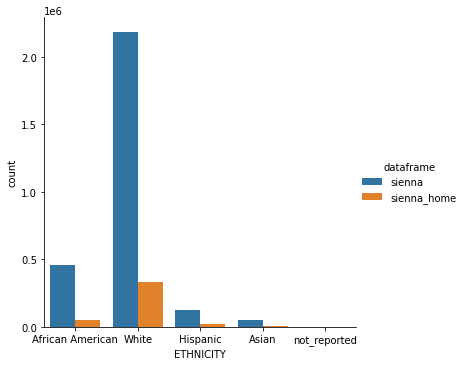

In [34]:
new_df = sienna[['ETHNICITY']]
new_df['dataframe'] = 'sienna'
new_df2 = sienna_home[['ETHNICITY']]
new_df2['dataframe'] = 'sienna_home'
combined = new_df.append(new_df2)
combined

sns.catplot(x = "ETHNICITY", kind="count", hue = 'dataframe', data=combined) 
len(new_df.index) 

This is where the bias can already take place. Toyota asked me to sell a car that is geared for family life, and so I selected those who have houses. This already discluded a good portion of people who could have afforded this car, but who don't have houses. This is where our tool would at this point, raise a red flag!
 
The following EDA is done to highlight additional insights to induced bias, or general insights on our data. 

### EDA

<AxesSubplot:xlabel='DEMO_HH_INCOME', ylabel='count'>

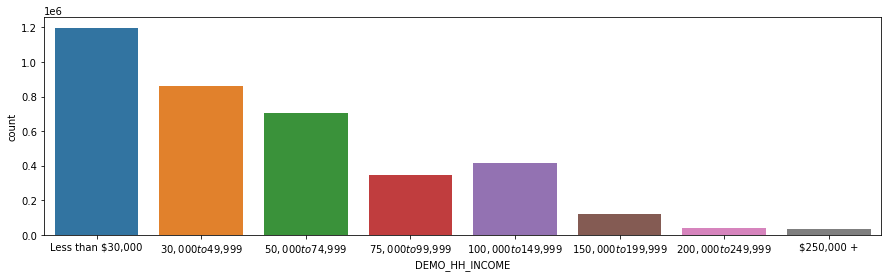

In [35]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="DEMO_HH_INCOME", order = ['Less than $30,000', '$30,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $149,999', '$150,000 to $199,999', '$200,000 to $249,999', '$250,000 +'], ax = ax, data=df)

Simple count of how many people of each race are in each income bracket. All bars in each group should add to 100%

<AxesSubplot:xlabel='DEMO_HH_INCOME', ylabel='count'>

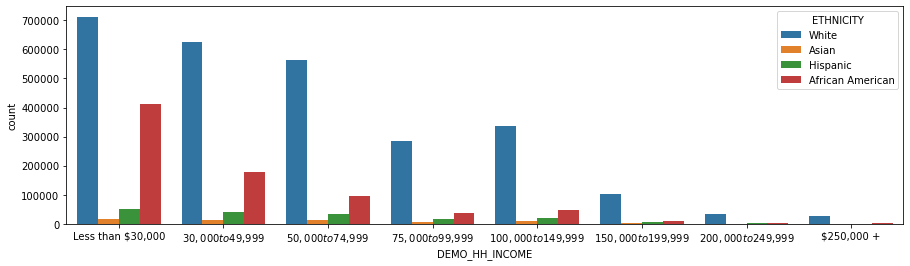

In [36]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="DEMO_HH_INCOME", order = ['Less than $30,000', '$30,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999', 
                                           '$100,000 to $149,999', '$150,000 to $199,999', '$200,000 to $249,999', 
                                           '$250,000 +'], hue = 'ETHNICITY',hue_order = ['White', 'Asian', 'Hispanic', 'African American'],  ax = ax, data=df)

Normailzed count of how many people of each race are in each income bracket. All bars in each group should add to 100%. Sanity check - it should look very similar to the above graph.

<AxesSubplot:xlabel='DEMO_HH_INCOME', ylabel='percent'>

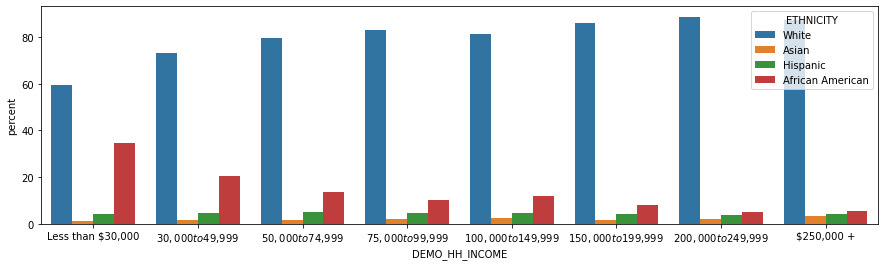

In [37]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#sns.set(color_codes=True)

df_plot = df

x,y = 'DEMO_HH_INCOME', 'ETHNICITY'

df_plot = df_plot.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()

sns.barplot(x=x, y='percent', hue=y, order = ['Less than $30,000', '$30,000 to $49,999',
                                              '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $149,999', 
                                              '$150,000 to $199,999', '$200,000 to $249,999', 
                                              '$250,000 +'], hue_order = ['White', 'Asian', 'Hispanic', 'African American'], ax=ax, data = df_plot)

Race by income - shows the percentage of people of a certain race who are in a certain bracket. All the bars for one race add to 100%

<AxesSubplot:xlabel='DEMO_HH_INCOME', ylabel='percent'>

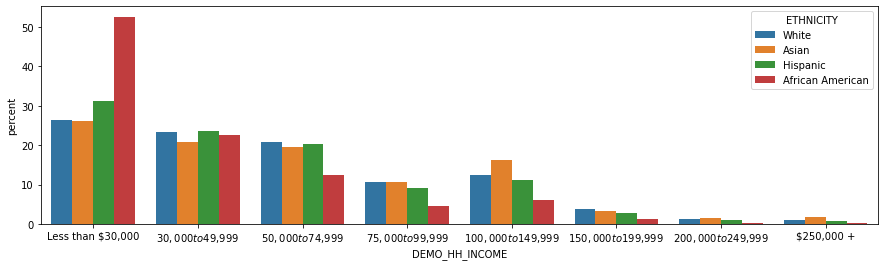

In [38]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)

df_plot = df

x,y = 'ETHNICITY', 'DEMO_HH_INCOME'


df_plot = df_plot.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()

sns.barplot(x=y, y='percent', hue=x, order = ['Less than $30,000', '$30,000 to $49,999', 
                                              '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $149,999', 
                                              '$150,000 to $199,999', '$200,000 to $249,999', 
                                              '$250,000 +'], hue_order = ['White', 'Asian', 'Hispanic', 'African American'],  ax=ax, data = df_plot)

We plan to include a widget to this audience selection tool, which would alarm the user that one of the distributions have changed drastically. In this example, the African American population has been drastically discluded.
We will accomplish the flagging by finding ways to measure entropy of distributions, after applying constraints on a feature. This would require us to find a method of computing entropy for each data type. For example, once I would apply the “$100,000 to $149,999”  to income level, I would use “Earth Mover’s Distance” to see how drastically each distribution changed thereafter.
 
Moreover, given the constraints of the time,while we will be able to flag large shifts in the distributions once changes are made to them in the audience selection process, we will be unable to make an actual model that can tell that the huge "shift" is biased. Thus, our product can help flag for bias, but won't be able to distinguish what it is.


# Conditional Entropy and Correlational Heatmaps 


Here we take a deeper dive into the relationships between the various features in our data. To do so, we use the entropy between the variables to innvestigate a few statistics that are similar to correlation coefficients, but are adjusted for categorical data. 

credits to Shaked Zychlinski for providing us with preliminary code to explore these relationships.



In [39]:
df2 = df
df2 = df2.rename(columns = {'ETHNICITY': 'RACE', 'Unnamed: 0':'ID'})
df2['ZIP'] = df2['ZIP'].astype(str)

In [40]:
_REPLACE = 'replace'
_DEFAULT_REPLACE_VALUE = 0.0

In [41]:
def replace_nan_with_value(x, y, value):
    x = np.array([v if v == v and v is not None else value for v in x])  # NaN != NaN
    y = np.array([v if v == v and v is not None else value for v in y])
    return x, y

In [42]:
def remove_incomplete_samples(x, y):
    x = [v if v is not None else np.nan for v in x]
    y = [v if v is not None else np.nan for v in y]
    arr = np.array([x, y]).transpose()
    arr = arr[~np.isnan(arr).any(axis=1)].transpose()
    if isinstance(x, list):
        return arr[0].tolist(), arr[1].tolist()
    else:
        return arr[0], arr[1]

In [43]:
def conditional_entropy(x,y,
                        nan_strategy=_REPLACE,
                        nan_replace_value=_DEFAULT_REPLACE_VALUE,
                        log_base: float = math.e):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    log_base: float, default = e
        specifying base for calculating entropy. Default is base e.
    Returns:
    --------
    float
    """
    if nan_strategy == _REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == _DROP:
        x, y = remove_incomplete_samples(x, y)
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy, log_base)
    return entropy

In [44]:
def theils_u(x,
             y,
             nan_strategy=_REPLACE,
             nan_replace_value=_DEFAULT_REPLACE_VALUE):
    """
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-
    categorical association. This is the uncertainty of x given y: value is
    on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.
    This is an asymmetric coefficient: U(x,y) != U(y,x)
    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    Returns:
    --------
    float in the range of [0,1]
    """
    if nan_strategy == _REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == _DROP:
        x, y = remove_incomplete_samples(x, y)
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

Conditional Entropy between 2 features:

In [45]:
conditional_entropy(df2['RACE'],df2['HOMEOWNERSHIP_STATUS'])

0.7606204671789172

Below is some pseudo-code intended to traverse through all features within the data in order to generate conditional entropy values with other features in the dataset. 

In [46]:
dictionary = dict()
for x in df2.columns:
    for y in df2.columns:
        dictionary[x + '_' + y] = conditional_entropy(df2[x],df2[y])
        print(dictionary[x + '_' + y])

0.0
9.502147567859236
14.30837363809115
11.527340273536373
15.126628144476237
13.387314367577085
13.442851748630838
14.344349695221325
14.576931302729152
13.859434419041776
0.0
0.0
5.623139249406866
5.608898484515456
5.624480577368362
3.9036064396727377
5.515212604428384
5.478784579056964
5.604797041131559
5.608634336118271
0.0
0.8169131782192813
0.0
0.7914383405400179
0.8182545061807902
0.8181746024938871
0.8142669069581385
0.8117811478703943
0.8086455004218251
0.7872437263625051
0.0
3.58370577875893
3.5724717059709796
0.0
3.599287871611751
3.598568395828873
3.5668340845322675
3.58833255601793
3.5327645610602105
3.499646145664598
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.018439639685462823
1.7392338736941817
1.7385943015982068
1.7393137773810847
0.0
1.7297807869318294
1.7322875259293917
1.7387062929004145
1.7385173678843238
0.0
1.5745084236853384
1.679788797402631
1.6513226095458002
1.6837763966252823
1.6742434061760267
0.0
1.6530732113055258
1.6402071935825535
1.65771138987234
0.

we now know that the categorical data types we have are fit for generating the various metrics, now we put those metrics into a heatmap


In [155]:
# creating a blank correlation matrix of dimension (num_features x num_feautres)
rows, cols = (len(df2.columns), len(df2.columns))
corra_matrix = [[0]*cols]*rows

In [156]:
dictionary.keys()

dict_keys(['ID_ID', 'ID_ZIP', 'ID_GENDER', 'ID_AGE', 'ID_STATE_ABBREVIATION', 'ID_DMA_NAME_ACXIOM', 'ID_DEMO_HH_INCOME', 'ID_RACE', 'ID_HOMEOWNERSHIP_STATUS', 'ID_EDUCATION', 'ZIP_ID', 'ZIP_ZIP', 'ZIP_GENDER', 'ZIP_AGE', 'ZIP_STATE_ABBREVIATION', 'ZIP_DMA_NAME_ACXIOM', 'ZIP_DEMO_HH_INCOME', 'ZIP_RACE', 'ZIP_HOMEOWNERSHIP_STATUS', 'ZIP_EDUCATION', 'GENDER_ID', 'GENDER_ZIP', 'GENDER_GENDER', 'GENDER_AGE', 'GENDER_STATE_ABBREVIATION', 'GENDER_DMA_NAME_ACXIOM', 'GENDER_DEMO_HH_INCOME', 'GENDER_RACE', 'GENDER_HOMEOWNERSHIP_STATUS', 'GENDER_EDUCATION', 'AGE_ID', 'AGE_ZIP', 'AGE_GENDER', 'AGE_AGE', 'AGE_STATE_ABBREVIATION', 'AGE_DMA_NAME_ACXIOM', 'AGE_DEMO_HH_INCOME', 'AGE_RACE', 'AGE_HOMEOWNERSHIP_STATUS', 'AGE_EDUCATION', 'STATE_ABBREVIATION_ID', 'STATE_ABBREVIATION_ZIP', 'STATE_ABBREVIATION_GENDER', 'STATE_ABBREVIATION_AGE', 'STATE_ABBREVIATION_STATE_ABBREVIATION', 'STATE_ABBREVIATION_DMA_NAME_ACXIOM', 'STATE_ABBREVIATION_DEMO_HH_INCOME', 'STATE_ABBREVIATION_RACE', 'STATE_ABBREVIATION_HOME

In [161]:
#populating the correlation matrix with our correlation metric of choice, in this case, conditional entropy
cont_entropy = []
for x in df2.columns:
    for y in df2.columns:
        cont_entropy = np.append(cont_entropy, round(dictionary[x + '_' + y], 3))
    print(cont_entropy)
    cont_entropy = []

[ 0.     9.502 14.308 11.527 15.127 13.387 13.443 14.344 14.577 13.859]
[0.    0.    5.623 5.609 5.624 3.904 5.515 5.479 5.605 5.609]
[0.    0.817 0.    0.791 0.818 0.818 0.814 0.812 0.809 0.787]
[0.    3.584 3.572 0.    3.599 3.599 3.567 3.588 3.533 3.5  ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.    0.018 1.739 1.739 1.739 0.    1.73  1.732 1.739 1.739]
[0.    1.575 1.68  1.651 1.684 1.674 0.    1.653 1.64  1.658]
[0.    0.637 0.776 0.771 0.782 0.775 0.752 0.    0.761 0.773]
[0.    0.53  0.54  0.483 0.55  0.549 0.506 0.528 0.    0.509]
[0.    1.251 1.236 1.168 1.267 1.266 1.241 1.257 1.227 0.   ]


Resources: 



1.   https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

2.   https://github.com/shakedzy/dython/blob/master/dython/nominal.py








Author(s): Wei Dai, Sam Stilson, Michelle Gu, Lubah Nelson, Noor-Ul-Ain Ali